In [25]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
#import pydotplus
#from IPython.display import Image

In [26]:
file_path_ad_clean = "../Raw_data/application_data_cleaned_ros.csv"
df_loans = pd.read_csv(file_path_ad_clean)
df_loans.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# convert text to numbers for model
df_loans = pd.get_dummies(df_loans)

In [28]:
# Define features set
X = df_loans.copy()
X.drop("TARGET", axis=1, inplace=True)
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,False,False,False,False,False,False,False,False,False,False
1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,False,False,False,False,False,False,False,False,False,False
2,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,-4970.0,-477,...,False,False,False,False,False,False,False,False,False,False
3,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,-1213.0,-619,...,False,False,False,False,False,False,False,False,False,False
4,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,-4597.0,-2379,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Define target vector
y = df_loans["TARGET"].values.reshape(-1, 1)
y[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [30]:
from imblearn.over_sampling import RandomOverSampler
sampling_strategy = 1
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
y_res_df = pd.DataFrame(y_res)

In [31]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=24)

In [32]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [33]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [34]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [36]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [37]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [38]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [39]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,33989,4157
Actual 1,8,38609


Accuracy Score : 0.9457420892878079
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     38146
           1       0.90      1.00      0.95     38617

    accuracy                           0.95     76763
   macro avg       0.95      0.95      0.95     76763
weighted avg       0.95      0.95      0.95     76763



In [40]:
import matplotlib.pyplot as plt    

In [41]:
# feature importance plot
feature_importance = model.feature_importances_
#plt.bar(range(len(model.feature_importances_)),model.feature_importances_)
columns_names = X.columns.tolist()
df_feature_importance = pd.DataFrame(feature_importance,index=columns_names,columns=['feature_importance'])
#df_feature_importance.reset_index(inplace=True)
df_feature_importance.sort_values(by='feature_importance',inplace=True,ascending=False)
df_feature_importance_top20 = df_feature_importance[:20]
df_feature_importance_top20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, EXT_SOURCE_3 to AMT_REQ_CREDIT_BUREAU_MON
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   feature_importance  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes


<Axes: >

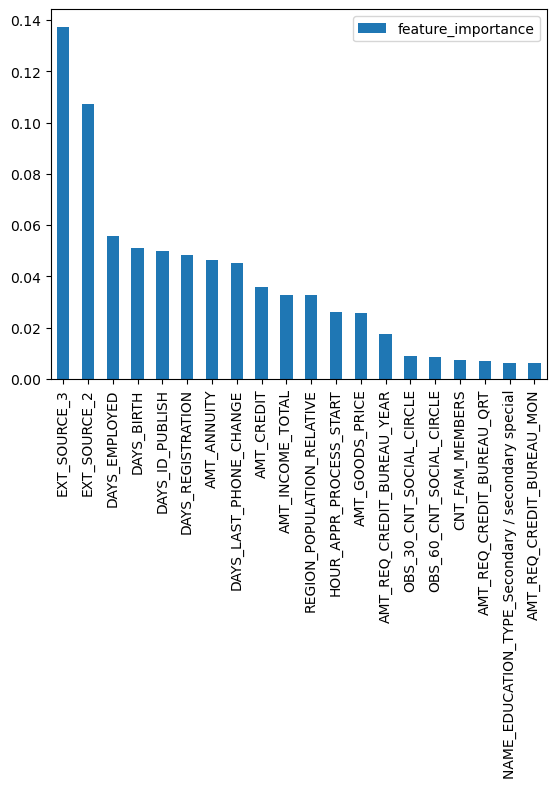

In [42]:
df_feature_importance_top20.plot.bar()

In [43]:
#text tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_27 <= -0.06
|   |--- feature_26 <= -0.10
|   |   |--- feature_27 <= -0.98
|   |   |   |--- feature_26 <= -1.39
|   |   |   |   |--- feature_18 <= -1.16
|   |   |   |   |   |--- feature_3 <= 0.55
|   |   |   |   |   |   |--- feature_1 <= 0.32
|   |   |   |   |   |   |   |--- feature_3 <= -1.18
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  -1.18
|   |   |   |   |   |   |   |   |--- feature_7 <= -0.63
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  -0.63
|   |   |   |   |   |   |   |   |   |--- feature_119 <= 0.90
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 1.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  1.25
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_119 >  0.90
|   |   |   |   |   |   |   |   |   |   |--- featu

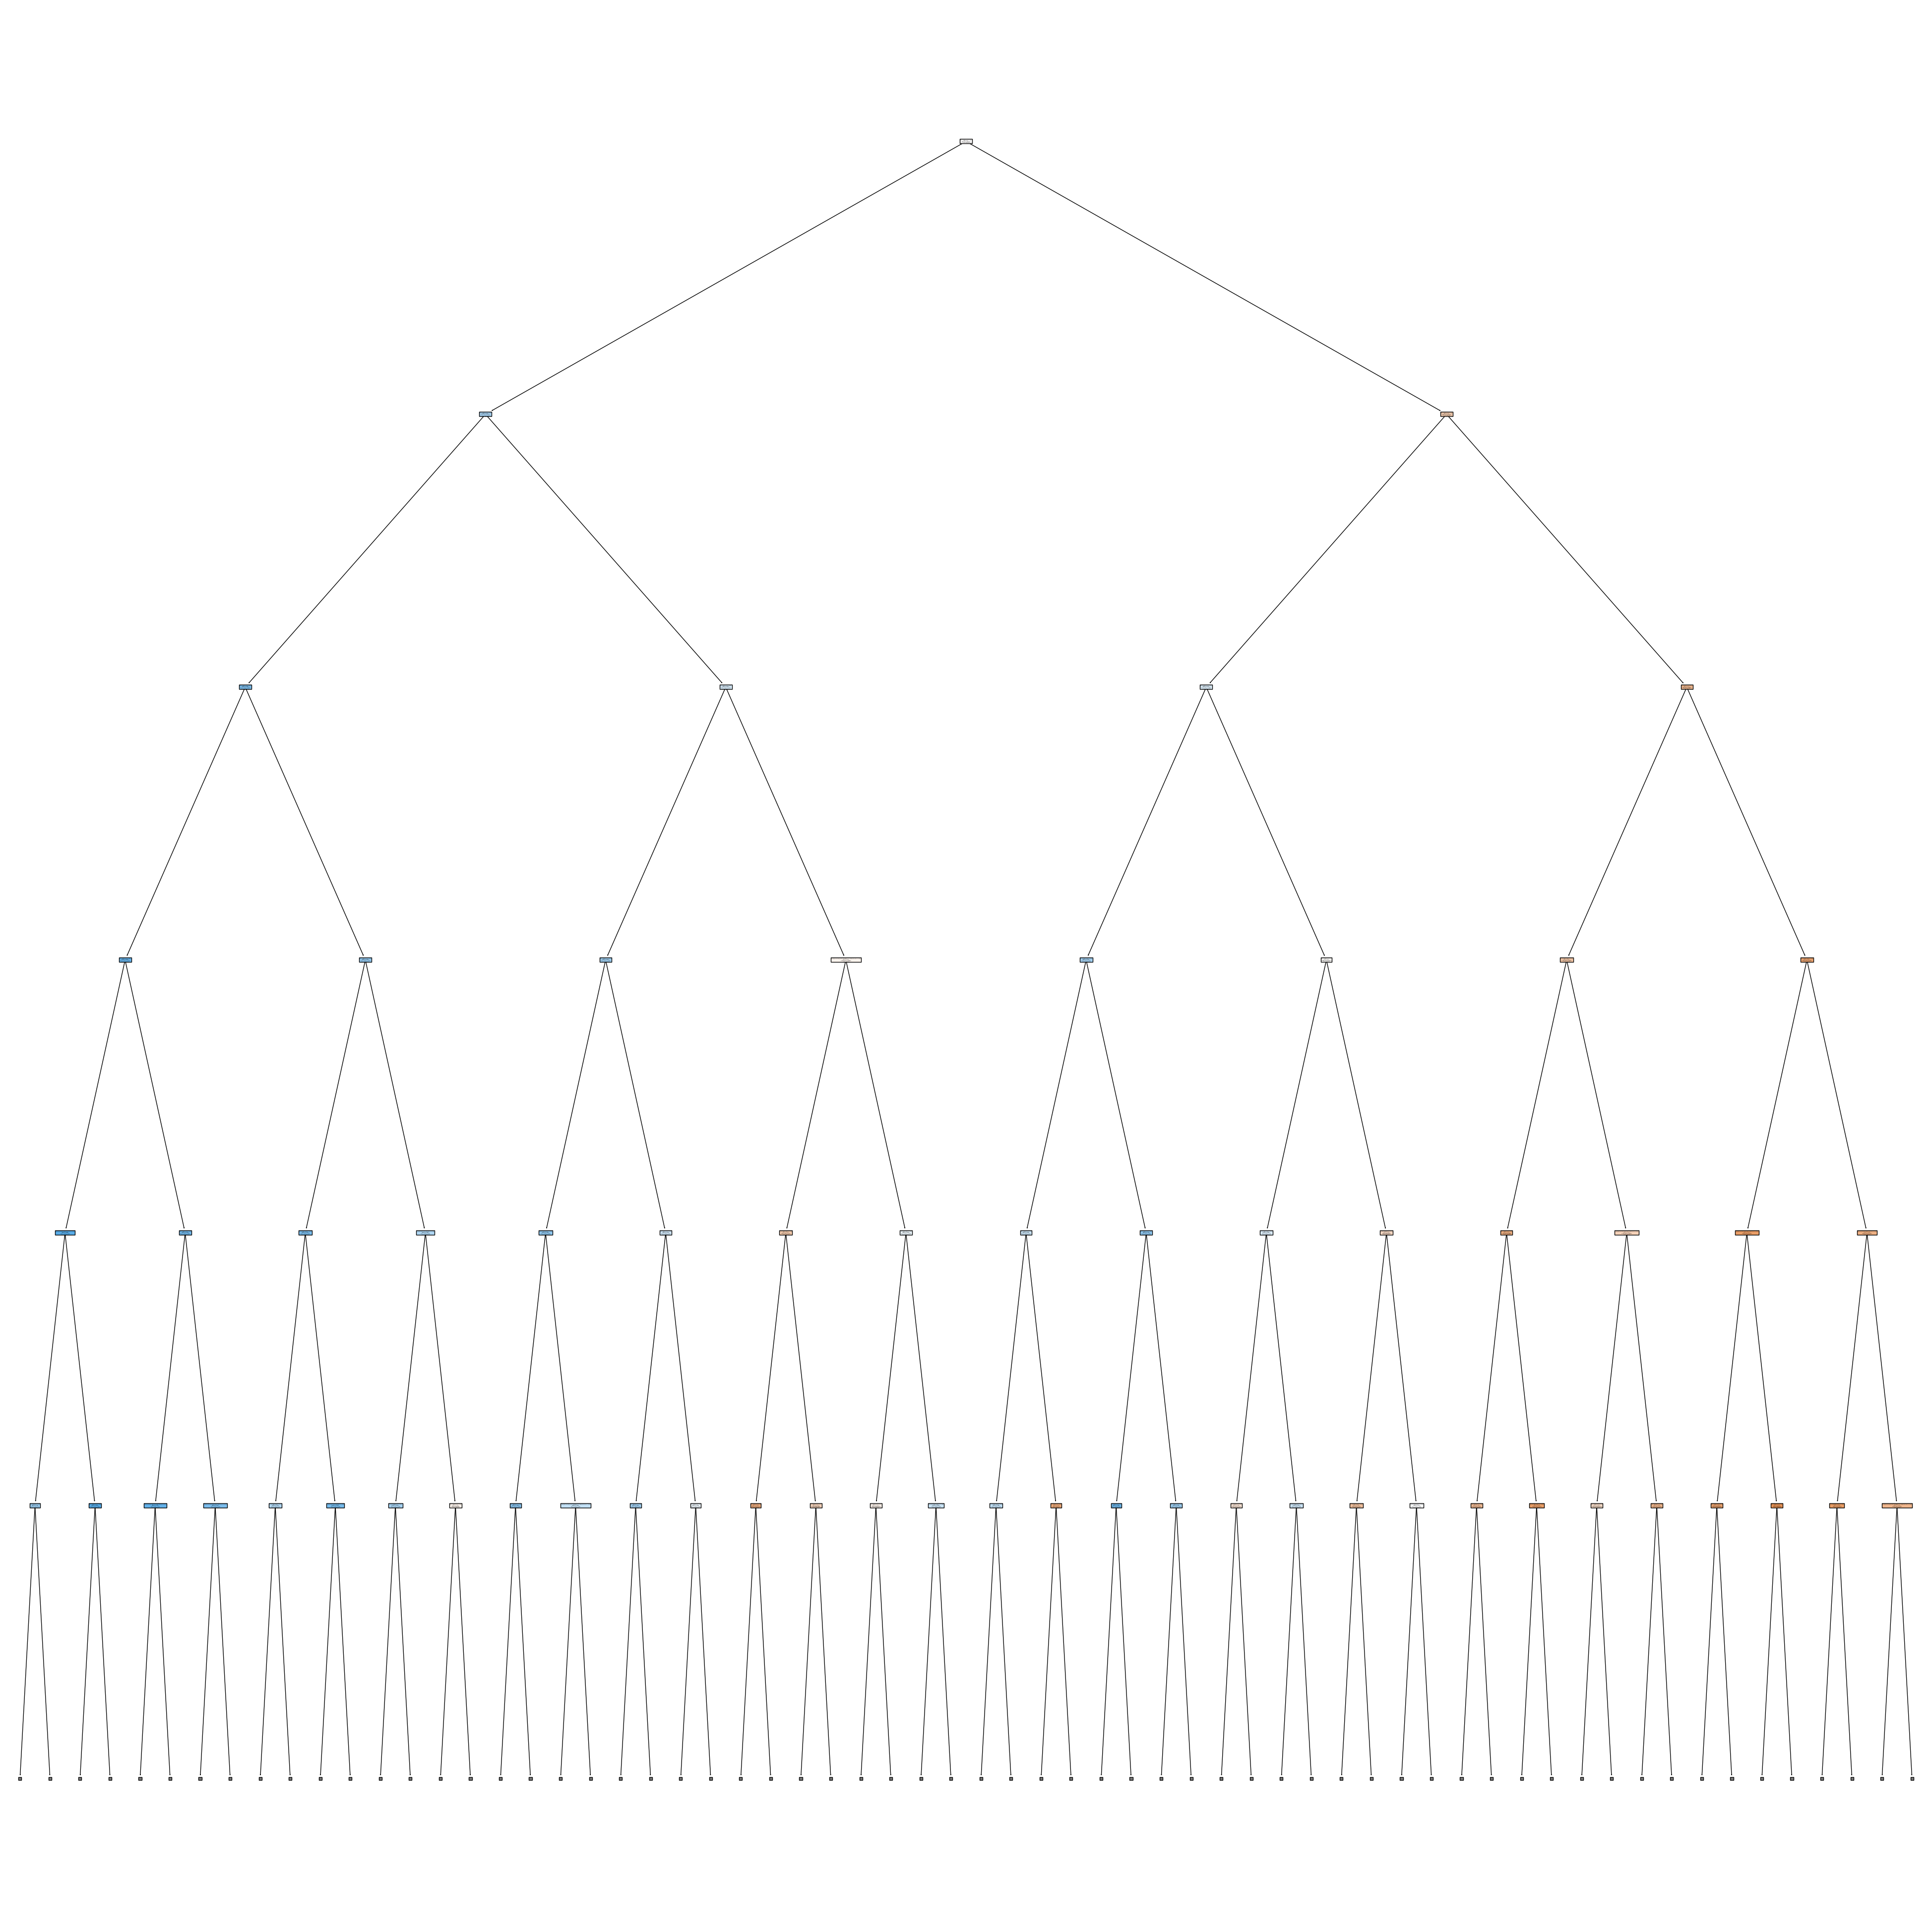

In [51]:
#tree plot
class_names = ['Normal','Defaulters']

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(model, 
                   feature_names=columns_names,  
                   class_names=class_names,
                   filled=True)


In [45]:
fig.savefig("decistion_tree.png")